<a href="https://colab.research.google.com/github/LittlePanther-Susie/Notebook-Publish/blob/main/2-Curve%20Fitting%20with%20SciPy%20and%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curve Fitting with Scipy and PyTorch

## Create a dataset

In [2]:
# Define a quadratic function
c1 = 1
c2 = -4
c3 = 4

def func(x,c1,c2,c3):
  return c1*x**2 + c2*x + c3

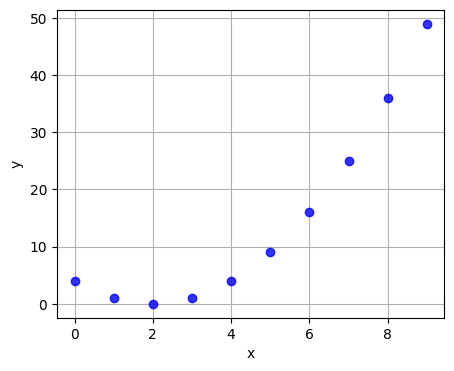

In [3]:
# Generate data. w/o noise
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.arange(10)
y = func(x,c1,c2,c3)

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## SciPy

Curve fitting

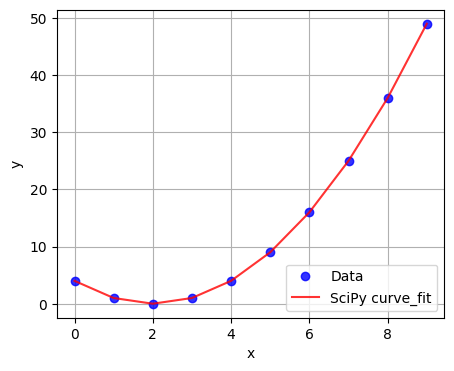

In [4]:
# curve fitting
from scipy.optimize import curve_fit

popt, pcov = curve_fit(func, x, y)
y_pred1 = func(x, *popt)

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, y_pred1, 'r', label='SciPy curve_fit', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

Parameters

In [5]:
# Parameter estimates
from scipy.stats import t

tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)

print(f"c1 (95%): {popt[0]:.2f} +/- {ts*np.diag(pcov)[0]:.2f}")
print(f"c2 (95%): {popt[1]:.2f} +/- {ts*np.diag(pcov)[1]:.2f}")
print(f"c3 (95%): {popt[2]:.2f} +/- {ts*np.diag(pcov)[2]:.2f}")

print(f"c1 error: {np.abs((c1-popt[0])/c1)*100:.2f} %")
print(f"c2 error: {np.abs((c2-popt[1])/c2)*100:.2f} %")
print(f"c3 error: {np.abs((c3-popt[2])/c3)*100:.2f} %")

c1 (95%): 1.00 +/- 0.00
c2 (95%): -4.00 +/- 0.00
c3 (95%): 4.00 +/- 0.00
c1 error: 0.00 %
c2 error: 0.00 %
c3 error: 0.00 %


## PyTorch

Define Linear Regression class using Neural Network module that contains linear functions

In [7]:
import torch
from torch import nn 
torch.manual_seed(1)

class RegressionModel(nn.Module):
  def __init__(self):
    super(RegressionModel, self).__init__()
    self.fc1 = nn.Linear(1, 30)
    self.fc2 = nn.Linear(30, 1)    

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = RegressionModel()
print(model)

RegressionModel(
  (fc1): Linear(in_features=1, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=1, bias=True)
)


Initial point

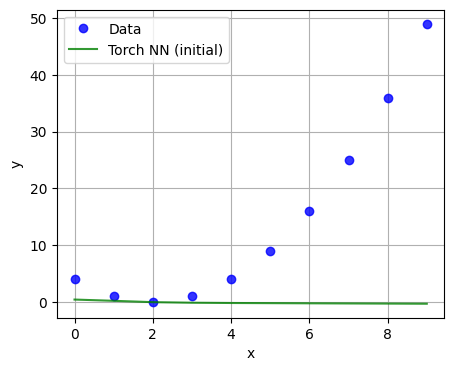

In [8]:
# Torch Tensor
xtt = torch.from_numpy(x.reshape(len(x),-1)).to(torch.float32)
ytt = torch.from_numpy(y.reshape(len(y),-1)).to(torch.float32)

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, model(xtt).detach().numpy(), 'g', label='Torch NN (initial)', alpha=0.8)
plt.legend(loc='best')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()


Training

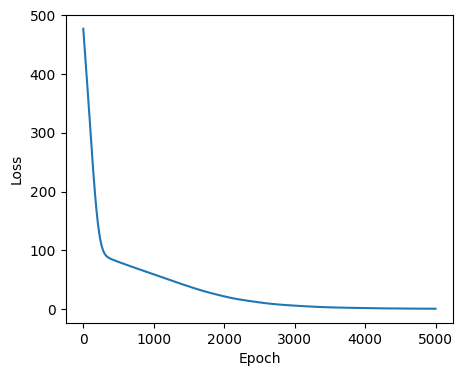

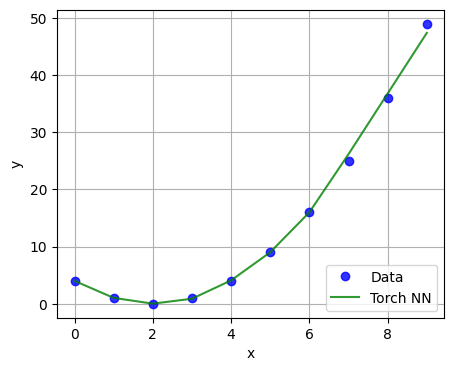

In [9]:
import torch.optim as optim
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.0005)
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5000
losses = []

for epocs in range(epochs):
  inputs = torch.from_numpy(x).float().unsqueeze(1)
  labels = torch.from_numpy(y).float().unsqueeze(1)

  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, labels)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()


plt.figure(figsize=(5,4))
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, model(xtt).detach().numpy(), 'g', label='Torch NN', alpha=0.8)
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## Comparison

Sum of Squared Error

In [10]:
# Predictions at x
yfit1 = y_pred1
yfit2 = model(xtt).detach().numpy()

sse1 = np.sum((y-yfit1)**2)
print(f'SSE_SciPy = {sse1:.2e}')

sse2 = np.sum((y-yfit2.T)**2)
print(f'SSE_TorchNN = {sse2:.2e}')

SSE_SciPy = 5.31e-29
SSE_TorchNN = 4.61e+00


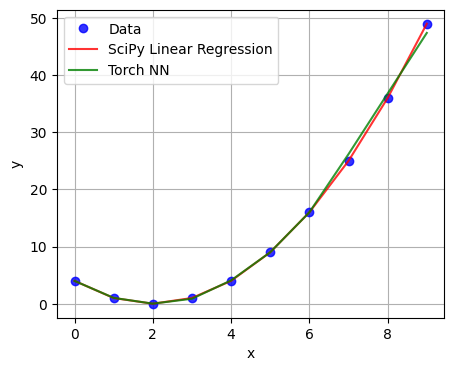

In [11]:
plt.figure(figsize=(5,4))
plt.plot(x, y, 'bo', label='Data', alpha=0.8)
plt.plot(x, yfit1, 'r', label='SciPy Linear Regression', alpha=0.8)
plt.plot(x, yfit2, 'g', label='Torch NN', alpha=0.8)
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## Discussion

The NN model is not robust but too sensitive to the setting. In the study, NN is less accurate than the conventional regression model, but there are opportunities to improve the NN model as below.

1. Increase the number of hidden layers
2. Increase the number of neurons in each layer
3. Increase the number of epochs during training
4. Use a different activation function
5. Use a different optimizer

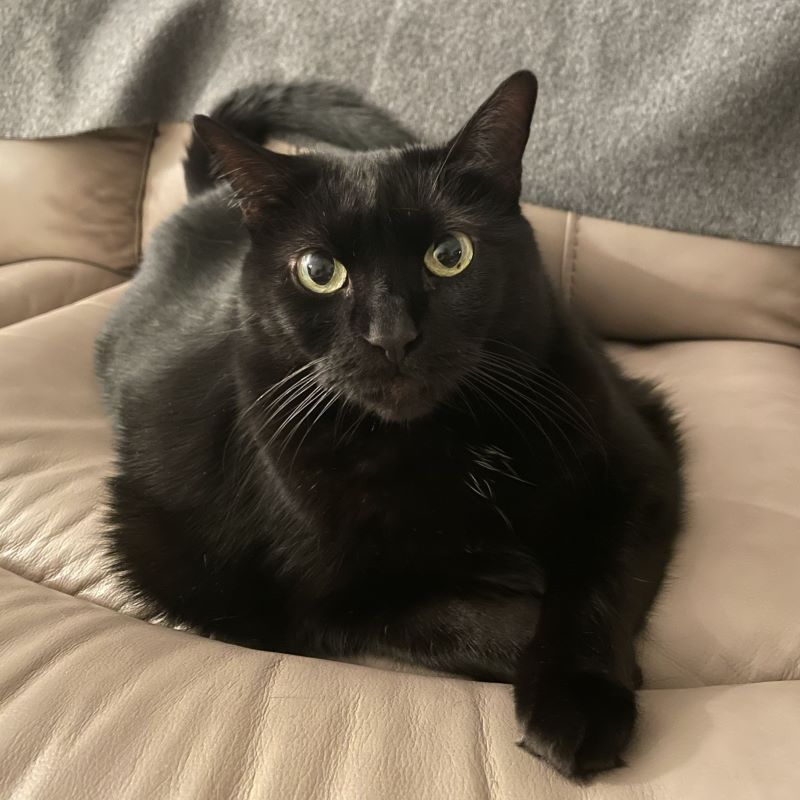